<html>
    <div dir = "rtl" style="font-size: 26px; color: blue">
        <b>
            پروژه چهارم درس هوش مصنوعی
            <br>
            <br>
            Machine Learning
        </b>
    </div>
<br>
<br>
<br>
    <div dir = "rtl" style="font-size: 24px; color: gray">
        <b>
            معین کرمی
            <br>
            <br>
            810198540
        </b>
    </div>
</html>


<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            هدف پروژه:
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <b>
            <br>
             هدف از این پروژه آشنایی با
            Machine Learning
            و ساخت یک 
            classifier
            است.
        <br>
        <br>
    </div>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            خلاصه ی مسئله:
        </b>
    </div>
    <br>
    <div dir = "rtl" style = "font-size: 16px">
            در این مسئله یک مجموعه داده شامل اطلاعات تعدادی قطعه‌ی موسیقی که شامل مدت زمان، انرژی، هنرمند و ... است به ما داده می‌شود و ما با ایجاد یک  
        classifier
        با استفاده از متد 
        Machine Learning
        و داده‌های در دسترس 
        به مشخص کردن ژانر قطعه های مختلف موسیقی می‌پردازیم.
    </div>
</html>


<html>
    <div dir = "rtl" style="font-size: 24px; color: orange">
        <b>
            فاز صفر: 
            EDA and Visualization
        </b>
    </div>
</html>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.feature_selection
import copy

In [2]:
data = pd.read_csv('dataset.csv')

data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            1)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        تابع 
        describe
        اطلاعات آماری هر ستون مانند چارک ها، کمینه، بیشینه و ... را به ما می‌دهد. 
    </div>
</html>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

<html>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        تابع 
        info
        اطلاعات کلی هر ستون مانند تایپ و تعداد مقادیر موجود را به ما می‌دهد.
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            2) 
        </b>
    </div>
</html>

In [4]:
data.apply(lambda col: col.isna().sum() / len(col) * 100)

artist_name          4.980000
track_name           0.000000
popularity           0.000000
acousticness         0.000000
danceability         0.000000
duration_ms         10.033333
energy               0.000000
instrumentalness     0.000000
key                  0.000000
liveness             0.000000
loudness             0.000000
mode                 0.000000
speechiness          0.000000
tempo                9.776667
valence              0.000000
music_genre          0.000000
dtype: float64

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            3) 
        </b>
    </div>
</html>

In [5]:
data.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.159,-7.429,Major,0.0382,142.065,0.607,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.127,-10.147,Major,0.1840,79.969,0.287,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.265,-7.080,Minor,0.0378,NaN,0.636,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.139,-15.542,Major,0.0346,82.707,0.206,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.306,-6.625,Major,0.0630,104.694,0.383,Jazz


In [6]:
# data['artist_name'].value_counts().plot(kind = 'bar')

In [7]:
# data['track_name'].value_counts().plot(kind = 'bar')

(array([ 849.,  191., 1308., 5436., 7563., 8680., 4613., 1215.,  136.,
           9.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

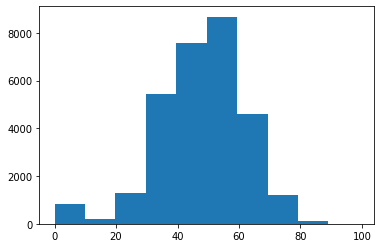

In [8]:
plt.hist(data['popularity'])

(array([11701.,  3177.,  2146.,  1679.,  1332.,  1172.,  1160.,  1273.,
         1481.,  4879.]),
 array([1.39000000e-06, 9.96012510e-02, 1.99201112e-01, 2.98800973e-01,
        3.98400834e-01, 4.98000695e-01, 5.97600556e-01, 6.97200417e-01,
        7.96800278e-01, 8.96400139e-01, 9.96000000e-01]),
 <BarContainer object of 10 artists>)

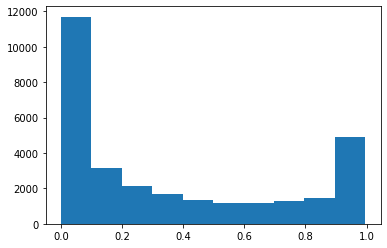

In [9]:
plt.hist(data['acousticness'])

(array([ 706., 1421., 2103., 3422., 4985., 6183., 5306., 3623., 1777.,
         474.]),
 array([0.0596 , 0.15134, 0.24308, 0.33482, 0.42656, 0.5183 , 0.61004,
        0.70178, 0.79352, 0.88526, 0.977  ]),
 <BarContainer object of 10 artists>)

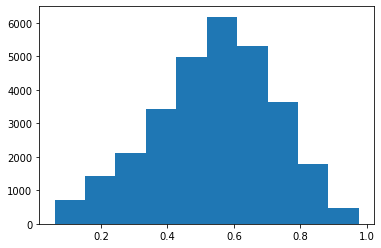

In [10]:
plt.hist(data['danceability'])

(array([2.3849e+04, 2.8330e+03, 2.3500e+02, 4.8000e+01, 1.8000e+01,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  15509. ,  333502.1,  651495.2,  969488.3, 1287481.4, 1605474.5,
        1923467.6, 2241460.7, 2559453.8, 2877446.9, 3195440. ]),
 <BarContainer object of 10 artists>)

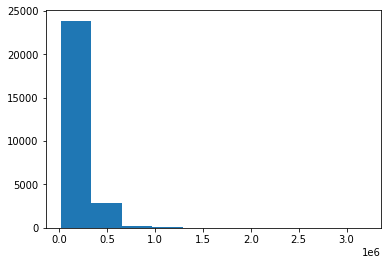

In [11]:
plt.hist(data['duration_ms'])

(array([2865., 1845., 1614., 2077., 2885., 3619., 4022., 4101., 4103.,
        2869.]),
 array([7.920000e-04, 1.005128e-01, 2.002336e-01, 2.999544e-01,
        3.996752e-01, 4.993960e-01, 5.991168e-01, 6.988376e-01,
        7.985584e-01, 8.982792e-01, 9.980000e-01]),
 <BarContainer object of 10 artists>)

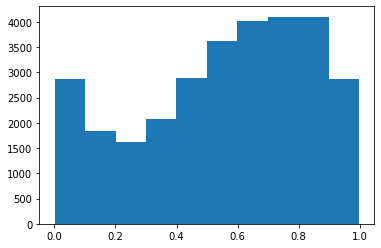

In [12]:
plt.hist(data['energy'])

(array([22248.,   737.,   446.,   390.,   367.,   418.,   486.,   753.,
         2005.,  2150.]),
 array([0.    , 0.0994, 0.1988, 0.2982, 0.3976, 0.497 , 0.5964, 0.6958,
        0.7952, 0.8946, 0.994 ]),
 <BarContainer object of 10 artists>)

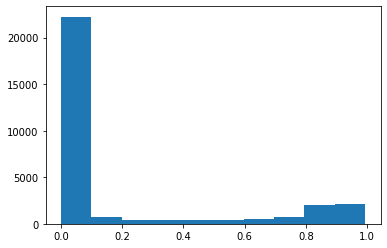

In [13]:
plt.hist(data['instrumentalness'])

<AxesSubplot:>

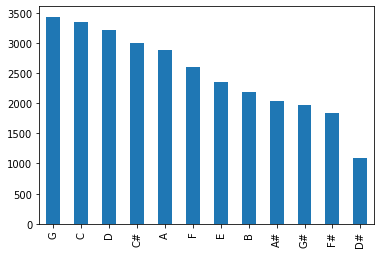

In [14]:
data['key'].value_counts().plot(kind = 'bar')

(array([13135.,  8962.,  3259.,  2556.,   642.,   406.,   475.,   276.,
          126.,   163.]),
 array([0.0157 , 0.11373, 0.21176, 0.30979, 0.40782, 0.50585, 0.60388,
        0.70191, 0.79994, 0.89797, 0.996  ]),
 <BarContainer object of 10 artists>)

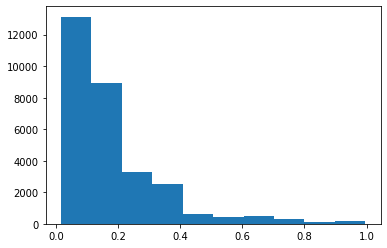

In [15]:
plt.hist(data['liveness'])

(array([1.4000e+01, 8.6000e+01, 2.5600e+02, 6.7600e+02, 1.3050e+03,
        1.7350e+03, 2.4820e+03, 6.6470e+03, 1.5362e+04, 1.4370e+03]),
 array([-47.046 , -42.2072, -37.3684, -32.5296, -27.6908, -22.852 ,
        -18.0132, -13.1744,  -8.3356,  -3.4968,   1.342 ]),
 <BarContainer object of 10 artists>)

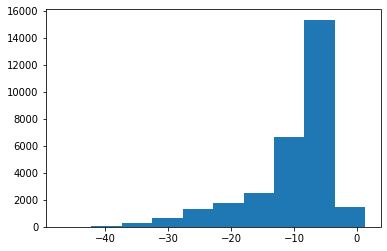

In [16]:
plt.hist(data['loudness'])

<AxesSubplot:>

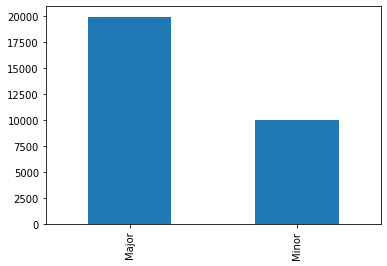

In [17]:
data['mode'].value_counts().plot(kind = 'bar')

(array([2.4542e+04, 2.3170e+03, 1.5620e+03, 1.0030e+03, 3.7900e+02,
        1.3000e+02, 3.0000e+01, 1.9000e+01, 8.0000e+00, 1.0000e+01]),
 array([0.0223 , 0.11417, 0.20604, 0.29791, 0.38978, 0.48165, 0.57352,
        0.66539, 0.75726, 0.84913, 0.941  ]),
 <BarContainer object of 10 artists>)

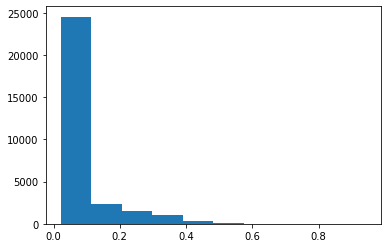

In [18]:
plt.hist(data['speechiness'])

(array([  40.,  795., 4827., 6020., 5129., 5112., 2704., 1892.,  451.,
          97.]),
 array([ 34.347 ,  52.8454,  71.3438,  89.8422, 108.3406, 126.839 ,
        145.3374, 163.8358, 182.3342, 200.8326, 219.331 ]),
 <BarContainer object of 10 artists>)

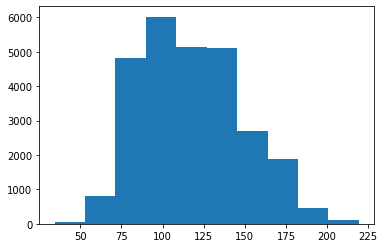

In [19]:
plt.hist(data['tempo'])

(array([2674., 3180., 3538., 4075., 3735., 3671., 3262., 2672., 1926.,
        1267.]),
 array([0.    , 0.0985, 0.197 , 0.2955, 0.394 , 0.4925, 0.591 , 0.6895,
        0.788 , 0.8865, 0.985 ]),
 <BarContainer object of 10 artists>)

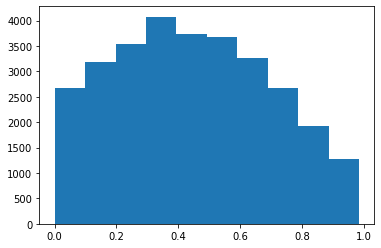

In [20]:
plt.hist(data['valence'])

<AxesSubplot:>

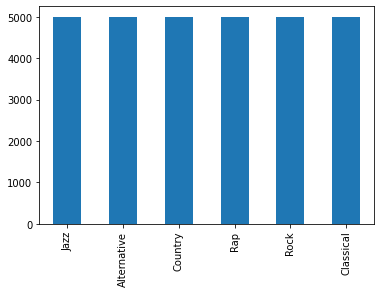

In [21]:
data['music_genre'].value_counts().plot(kind = 'bar')

<html>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        اکثر داده ها توزیع نرمال دارند، ولی برخی چولگی زیادی دارند.
        <br>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 24px; color: orange">
        <b>
            فاز اول: 
            Preprocessing
        </b>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            1)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        ۱.
       حذف دیتا هایی که شامل مقدار
        NAN
        هستند.
          <br>
        مزیت: این روش بسیار سریع و آسان است
        <br>
        ایراد: ممکن است دیتاهایی که حذف می‌شوند شامل اطلاعات مهمی باشند و همچنین ممکن است داده های زیادی حذف شوند.
        <br><br>
        2.
        پر کردن خانه های 
        NAN
        با میانگین، میانه، مود و دیگر داده های آماری
        <br>
        مزیت: در این متد هیچ دیتایی از دست نمی‌رود
        <br>
        ایراد: اگر یک ستون مقدار زیادی 
        NAN
        داشته باشد، دیتای بی معنی زیادی به وجود می‌آید.
        <br>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            ۲)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        به جای داده های 
        NAN
        از مود(دیتا با بیشترین تکرار استفاده می‌کنیم)
        <br>
    </div>
</html>

In [22]:
data.apply(lambda col: col.fillna(col.mode()[0], inplace = True))

artist_name         None
track_name          None
popularity          None
acousticness        None
danceability        None
duration_ms         None
energy              None
instrumentalness    None
key                 None
liveness            None
loudness            None
mode                None
speechiness         None
tempo               None
valence             None
music_genre         None
dtype: object

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            3)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
       Normalize:
        این متد متغیر های عددی را به یک عدد بین ۰ و ۱ تبدیل می‌کند که معادله این تبدیل برابر است با:
        $$ x_{new} = \frac{x_{old} - x_{min}}{x_{max} - x_{min}}$$
        <br>
        Standardization:
        در این متد متغیر ها به شکلی تغییر می‌کنند که میانگین آن ها برار ۰ و انحراف معیارشان برابر ۱ باشد.
        $$x_{new} = \frac{x_{old} - \mu}{\sigma}$$
        <br>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            4)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
       با توجه به اینکه داده ها تقریبا توزیع نرمال دارند از متد
        Sandardization
        استفاده می‌کنیم چون با این کار دیتای ما تبدیل به توزیع نرمال استانداد می‌شود و بیشتر مقادیر به صورت خودکار میان -۱و۱ قرار می‌گیرند.
        <br>
    </div>
</html>

In [23]:
data = data.apply(lambda col : col if isinstance(col[0], str) else (col - col.mean()) / col.std())
data

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",-0.259741,-0.970532,0.935904,0.423583,0.231381,-0.458783,G,-0.163272,0.381203,Major,-0.489052,0.831331,0.644987,Jazz
1,FloFilz,Corners,-0.948794,-0.034765,1.034959,-1.253933,-0.150111,-0.527946,C,-0.375567,-0.009655,Major,1.072549,-1.296071,-0.641471,Jazz
2,Bonobo,We Could Forever,0.222596,-0.937884,0.704778,-0.551790,1.181513,2.122853,G,0.539958,0.431391,Minor,-0.493336,0.075798,0.761572,Jazz
3,Nils Landgren,A Child Is Born,-0.604268,1.533131,-0.313279,-0.103312,-1.754179,-0.548746,F,-0.295956,-0.785474,Major,-0.527610,-1.202267,-0.967105,Jazz
4,Masayoshi Takanaka,Samba Pati,-0.810984,-0.892852,-0.373812,0.947036,0.958376,0.805165,G,0.811962,0.496821,Major,-0.223430,-0.448995,-0.255534,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",-1.775658,1.513910,-1.182754,1.184218,-1.524924,-0.548956,G,-0.355665,-1.497445,Major,-0.301617,-0.880807,-0.967105,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",-1.500037,1.662188,-2.283356,2.523892,-1.269396,2.089455,B,-0.514887,-0.919499,Major,-0.475128,-1.211517,-1.639681,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",0.429312,1.692392,-0.979143,0.204189,-1.589705,-0.548956,D,-0.559999,-1.041876,Major,-0.160237,0.075798,-0.866601,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",-0.397552,1.717105,-2.299865,0.180501,-1.940966,2.201793,E,-0.388836,-1.954453,Major,-0.461204,-1.579194,-1.653752,Classical


<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            5)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
       ۱. Label Encoding or Ordinal Encoding:
        در این روش به هر دسته یک عدد نسبت داده می‌شود، این متد بیشتر در داده هایی استفاده میشود که دسته ها در آن ترتیب دارند.
        <br>
        ۲. One Hot Encoding:
        فرض کنید یک ستون شامل داده دسته ای است که می‌تواند شامل 
        x
        مقدار مختلف باشد.
        <br>
        در این روش این ستون داده را حذف کرده و 
        x
        ستون اضافه می‌کنیم و اگر در ستون اصلی این متغیر شامل دسته ی iام 
        بود در خانه ی مربوط به این داده و ستون 
        iام 
        که جدید اضافه شده، ۱ می‌گذاریم و باقی خانه های مربوط به این دیتا در ستون های اضافه شده ۰ قرار می‌دهیم.
        <br><br>
        من از متد اول استفاده می‌کنم چون متد دوم در داده های دسته ای که می‌توانند مقادیر مختلف زیادی داشته باشند(مانند ستون اول و دوم دیتای ما) بسیار بد عمل می‌کند و همچنین متد اول هم سربع تر است و هم فضای  کمتری اشغال می‌کند
        <br>
    </div>
</html>

In [24]:
tmp = data['music_genre']
data = data.apply(lambda col : col.astype('category').cat.codes if isinstance(col[0], str) else col)
data['music_genre'] = tmp
data['music_genre'] = data['music_genre'].astype('category')

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            6)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
       چون این ستون داده مقادیر مختلف بسیار زیادی دارد، نمی‌توان 
        از
        One Hot Encoding
        استفاده کرد، ولی می‌توان از 
        Label Encoding
        استفاده کرد
        <br>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            7)
        </b>
    </div>
</html>

<BarContainer object of 15 artists>

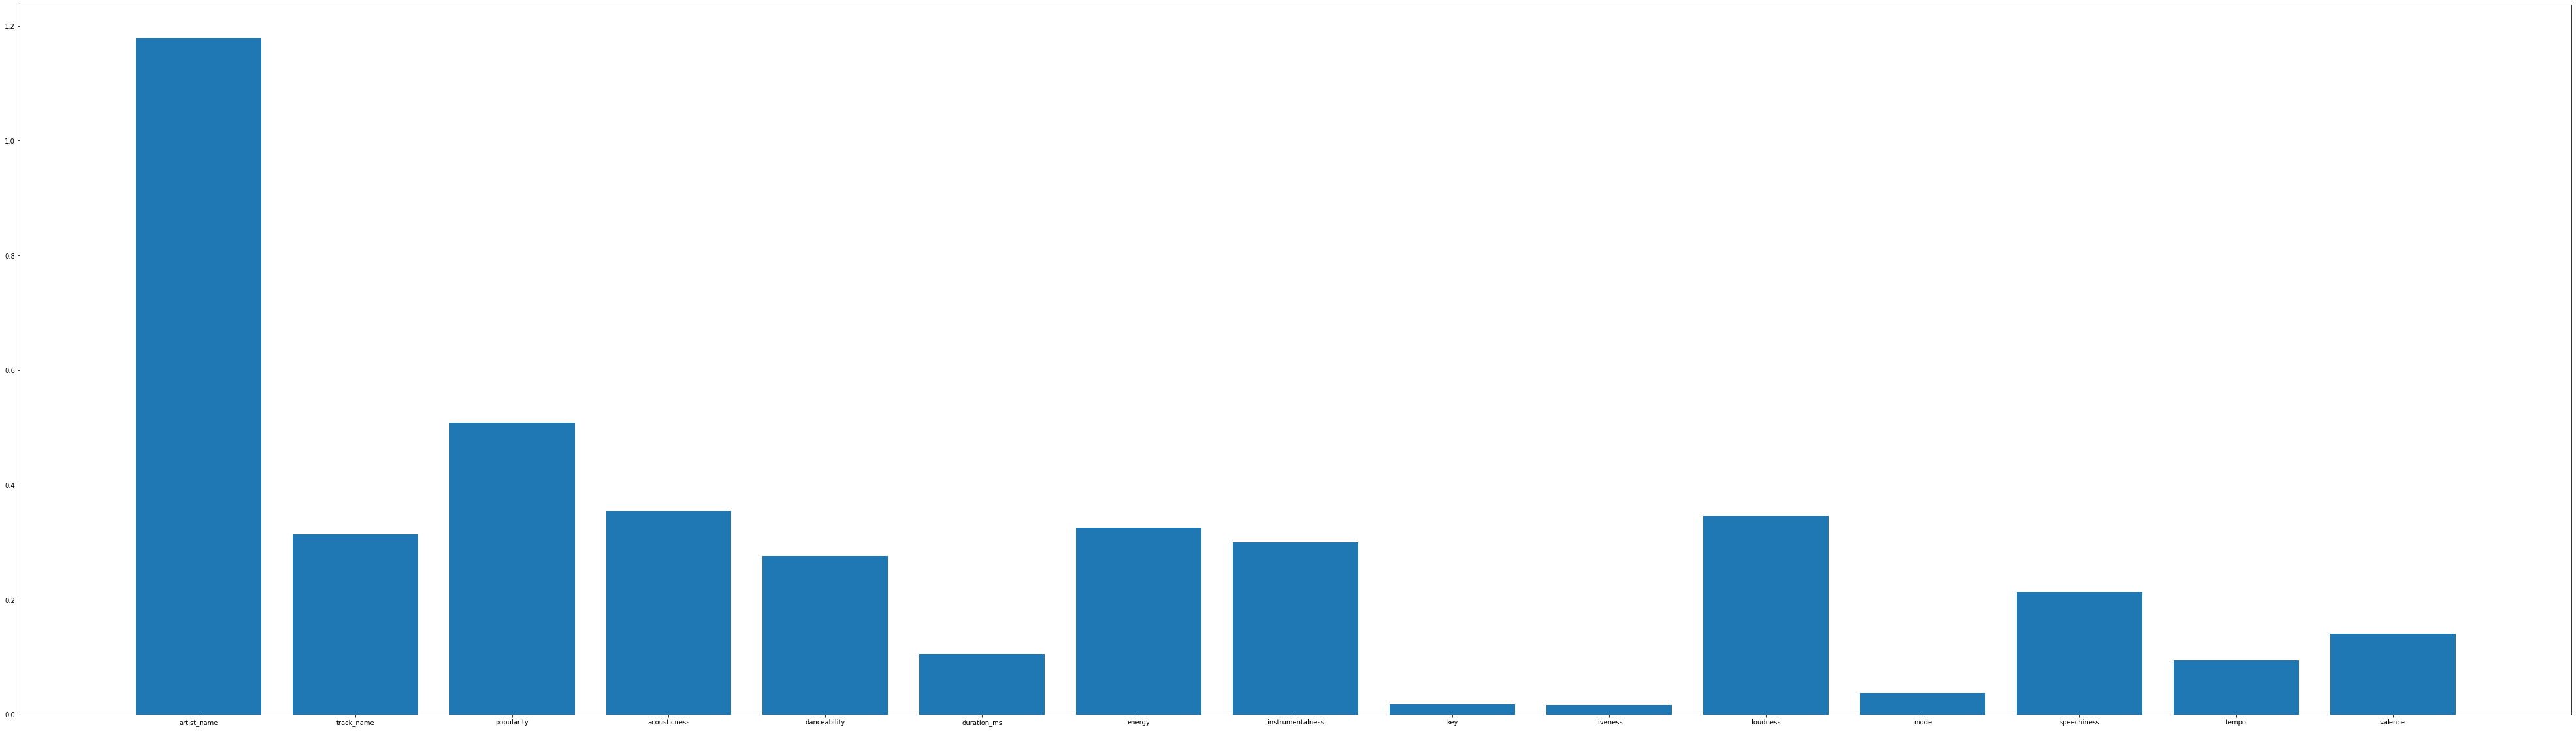

In [25]:
fig = plt.figure(figsize = (70, 20))
cp = copy.deepcopy(data)
cp = cp.iloc[: , :-1]
info = sklearn.feature_selection.mutual_info_classif(cp, data['music_genre'])
plt.bar(cp.columns, info)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            8)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
       اولین ویژگی یعنی نام خواننده با توجه به 
        information gain
        بالایی که دارد در پیش‌بینی ژانر موسیقی مفید تر از بقیه است 
        ولی متغیر هایی مثل
        mode, liveness, key, ...
        از میان متغیر های دیگر 
        information gain 
        خیلی کمی دارند و می‌تواند حذفشان کرد.
        <br>
        مزیت حذف کردن: این کار هم مدل را ساده تر و هم سریع تر می‌کند و همچنین ممکن است حذف نکردن این ویژگی ها خطای ما را افزایش دهند و باعث
        overfitting
        شوند.
        <br>
        معایب حذف کردن:
        این ویژگی ها ممکن است به تنهایی سود نداشته باشند و حتی باعث 
        overfitting
        شوند ولی ممکن است ترکیب این ویژگی ها اطلاعات مفیدی برای ما داشته باشد و با حذف همه ی این ویژگی ها ما این اطلاعات را از دست بدهیم.
        <br>
        ما 10 داده را حذف می‌کنیم .
    </div>
</html>

In [26]:
real_data = copy.deepcopy(data)
del data['mode']
del data['liveness']
del data['key']
del data['valence']
del data['tempo']
del data['duration_ms']
del data['speechiness']
del data['danceability']
del data['instrumentalness']
del data['track_name']

<html>
    <div dir = "rtl" style="font-size: 24px; color: orange">
        <b>
            فاز اول: 
            Model Training, Evaluation and Hyper Parameter Tuning
        </b>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            1)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
       مقدار 
        p
        را برابر 10 در نظر می‌گیریم.
        <br><br>
        بلی داده ها باید به صورت اتفاقی تقسیم شوند، چون در غیر این صورت مثلا اگر ۱۰ درصد داده اول را برای داده تست انتخاب کنیم، در این صورت تمام تست دیتای ما موسیقی جاز هستند و ما نمیتوانیم به درستی مدل خود را ارزیابی کنیم زیرا هیچ داده ی دیگری از ژانر های دیگر برای تست کردن نداریم.
        <br><br>
        بهتر است که نسبت ژانر ها به کل در هر دو داده ی تست و هم ترین برابر باشد.
        <br>
        برابر بودن این نسبت در داده ترین باعث می‌شود که مدل آموزش دیده ی ما بایاس نداشته باشد، به عبارت دیگر اگر از یک ژانر تعداد زیادی داده در ترین دیتا داشته باشیم و از ژانر دیگه ای مقدار کمی دیتا داشته باشیم، پیشبینی های ما بایاس دار می‌شوند و بیشتر به سمت ژانری می‌روند که سمپل های زیادی از آن دیده ایم و کمتر ژانری را پیش‌بینی می‌کند که دیتای کمی از آن دیده.
        <br>
        برابر بودن این نسبت در تست دیتا باعث می‌شود که ما به درستی بتوانیم مدل خود را ارزیابی کنیم، چون کم بودن دیتا از یک ژانر خاص باعث می‌شود ما نتوانیم به درستی قدرت مدل خود را در پیشبینی این ژانر را ارزیابی کنیم.
        <br><br>
        متغیر 
        stratify
        در تابع 
        train_test_split
        یک آرایه است که به صورت پیشفرض 
        None
        است و اگر 
        None
        نباشد، دیتا بر اساس این آرایه تقسیم می‌شود.
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            2)
        </b>
    </div>
</html>

In [27]:
train, test = sklearn.model_selection.train_test_split(data, test_size = 0.1)
x_train = train.iloc[: , :-1]
x_test = test.iloc[: , :-1]
y_train = train.iloc[ : , len(train.columns) - 1]
y_test = test.iloc[ : , len(train.columns) - 1]

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            3) KNN
        </b>
    </div>
</html>

In [28]:
def get_accuracy(pred, real):
    return sum(pred == real) / len(pred)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_acc.append(get_accuracy(knn.predict(x_train), y_train))
    test_acc.append(get_accuracy(knn.predict(x_test), y_test))

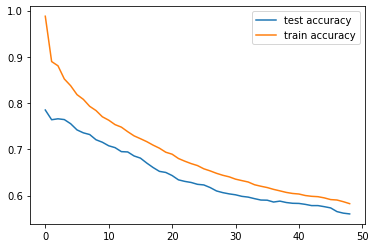

In [30]:
plt.plot(test_acc)
plt.plot(train_acc)
plt.legend(["test accuracy", "train accuracy"], loc ="upper right")

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            4) Decision Tree
        </b>
    </div>
</html>

In [76]:
data = copy.deepcopy(real_data)
del data['mode']
del data['liveness']
del data['key']
del data['valence']
del data['tempo']
del data['duration_ms']
# del data['speechiness']
# del data['danceability']
# del data['instrumentalness']
# del data['track_name']
# del data['energy']
# del data['loudness']
# del data['acousticness']
train, test = sklearn.model_selection.train_test_split(data, test_size = 0.1)
x_train = train.iloc[: , :-1]
x_test = test.iloc[: , :-1]
y_train = train.iloc[ : , len(train.columns) - 1]
y_test = test.iloc[ : , len(train.columns) - 1]

In [77]:
from sklearn import tree
train_acc = []
test_acc = []
for i in range(1, 50):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(x_train, y_train)
    train_acc.append(get_accuracy(clf.predict(x_train), y_train))
    test_acc.append(get_accuracy(clf.predict(x_test), y_test))

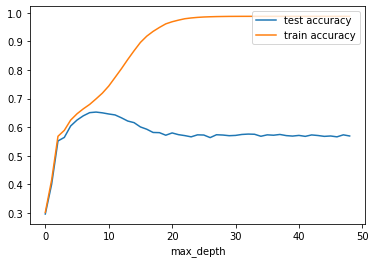

In [78]:
plt.plot(test_acc)
plt.plot(train_acc)
plt.xlabel('max_depth')
plt.legend(["test accuracy", "train accuracy"], loc ="upper right")

In [79]:
train_acc = []
test_acc = []
for i in range(1, 400):
    clf = tree.DecisionTreeClassifier(min_samples_leaf = i)
    clf = clf.fit(x_train, y_train)
    train_acc.append(get_accuracy(clf.predict(x_train), y_train))
    test_acc.append(get_accuracy(clf.predict(x_test), y_test))

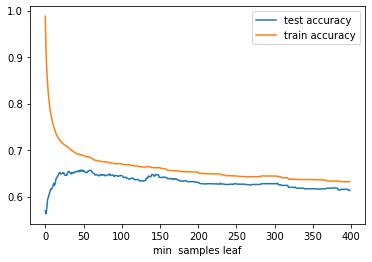

In [80]:
plt.plot(test_acc)
plt.plot(train_acc)
plt.xlabel('min  samples leaf')
plt.legend(["test accuracy", "train accuracy"], loc ="upper right")